# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [119]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.util
import scipy
import scipy.signal
from pathlib import Path
%matplotlib inline

### Reading the Mosaic Image

In [45]:
IMG_DIR = 'images'
IMG_NAME = 'crayons.bmp'

In [46]:
def read_image(IMG_NAME):
    # build path relative to current notebook
    img_path = Path() / IMG_DIR / IMG_NAME
    return skimage.io.imread(img_path)

In [47]:
mosaic_img = read_image(IMG_NAME)

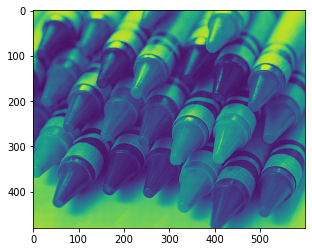

In [48]:
plt.imshow(mosaic_img)

### Linear Interpolation

In [254]:
def conv2(im, filt):
    '''Helper function to do zero-padded 2D convolution.'''
    return scipy.signal.convolve2d(im, filt, mode='same', boundary='fill', fillvalue=0)

In [ ]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [265]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    soln_image = np.zeros(mosaic_img.shape + (3, ), dtype=mosaic_img.dtype)
    
    # split colors into their own layer
    #        R   G_1
    #       G_2   B
    # R
    soln_image[::2, ::2, 0] = mosaic_img[::2, ::2]
    # G1/2
    soln_image[::2, 1::2, 1] = mosaic_img[::2, 1::2]
    soln_image[1::2, ::2, 1] = mosaic_img[1::2, ::2]
    # B
    soln_image[1::2, 1::2, 2] = mosaic_img[1::2, 1::2]

    rb_kernel = [
        [0.25, 0.5,  0.25],
        [0.5,  1,   0.5 ],
        [0.25, 0.5,  0.25]
    ]

    # G does not need diagonal components
    g_kernel = [
        [0, 0.25, 0],
        [0.25, 1, 0.25], 
        [0, 0.25, 0]
    ]
    
    # loop over each color and filter by its kernel
    for i, kernel in enumerate((rb_kernel, g_kernel, rb_kernel)):
        soln_image[..., i] = conv2(soln_image[..., i], kernel).astype(np.uint8)

    return soln_image

In [275]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    err = np.abs(soln_image - original_image)

    # preview error map
    plt.imshow(err);

    return np.mean(err), np.max(err)

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

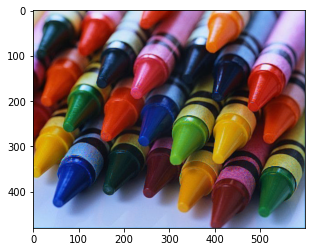

In [276]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')

# For sanity check display your solution image here
plt.imshow(soln_image);

The average per-pixel error for crayons is: 93.15107291666666
The maximum per-pixel error for crayons is: 255


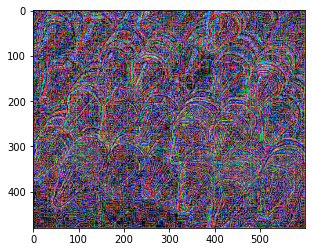

In [277]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

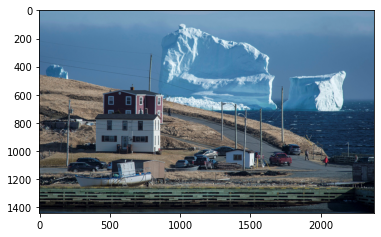

In [278]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')

# For sanity check display your solution image here
plt.imshow(soln_image);

The average per-pixel error for iceberg is: 69.44205227477687
The maximum per-pixel error for iceberg is: 255


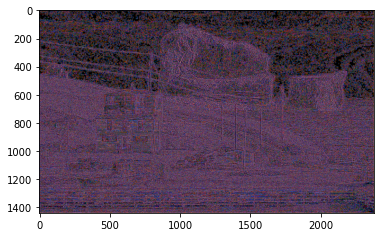

In [279]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

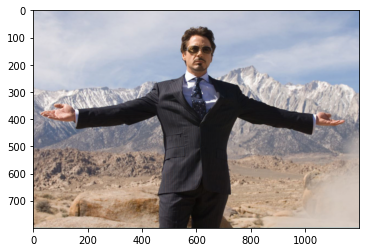

In [282]:
mosaic_img = read_image('tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('tony.jpg')

# For sanity check display your solution image here
plt.imshow(soln_image);

The average per-pixel error for tony is: 66.99818159722223
The maximum per-pixel error for tony is: 255


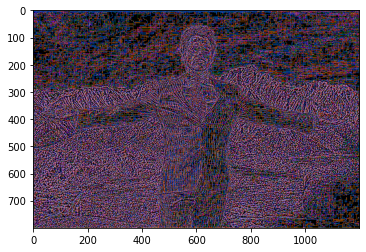

In [283]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

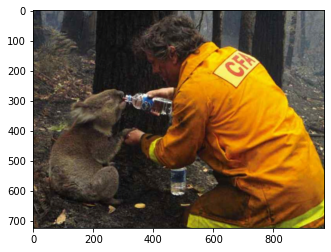

In [284]:
mosaic_img = read_image('hope.bmp')
soln_image = get_solution_image(mosaic_img)

# Generate your solution image here and show it 
plt.imshow(soln_image);

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [250]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    return freeman_soln_image

In [251]:
mosaic_img = read_image('tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
### YOUR CODE

NameError: name 'freeman_soln_image' is not defined

In [ ]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [ ]:
### Feel free to play around with other images for Freeman's method above ###

In [ ]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [ ]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    return mosaic_img

In [ ]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

In [ ]:
### YOUR CODE HERE ###

### Bonus Points

In [ ]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####